## Decision Tree Alogorithm (Use for Both Classification & Regression)
##### (Practice Classification Example)

In [124]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [125]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Social_Network_Ads.csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [126]:
dataset.drop(['User ID','Gender'], axis=1, inplace=True)

In [127]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

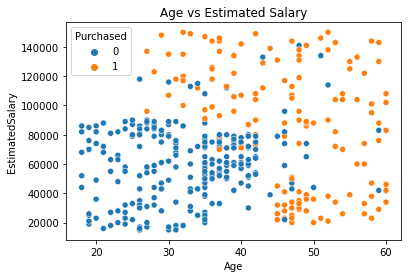

In [128]:
# check data is linearly separable or not but this is not a linear model
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')
plt.title('Age vs Estimated Salary')
plt.show()

In [129]:
x =dataset.iloc[:, :-1]
y = dataset['Purchased']

In [130]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x)


In [131]:
#x =pd.DataFrame(scaler.transform(x),columns=x.columns)

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [133]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [134]:
print(f"Train Score: {model.score(x_train, y_train) * 100:.2f}%")
print(f"Test Score: {model.score(x_test, y_test) * 100:.2f}%")

Train Score: 99.69%
Test Score: 83.75%


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


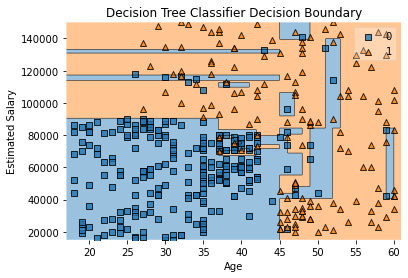

In [135]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=model)
plt.title('Decision Tree Classifier Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [136]:
model.predict([[25,33000]]) # predicting for a data point with age 25 and estimated salary 33000

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [137]:
model.predict([[32,150000]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

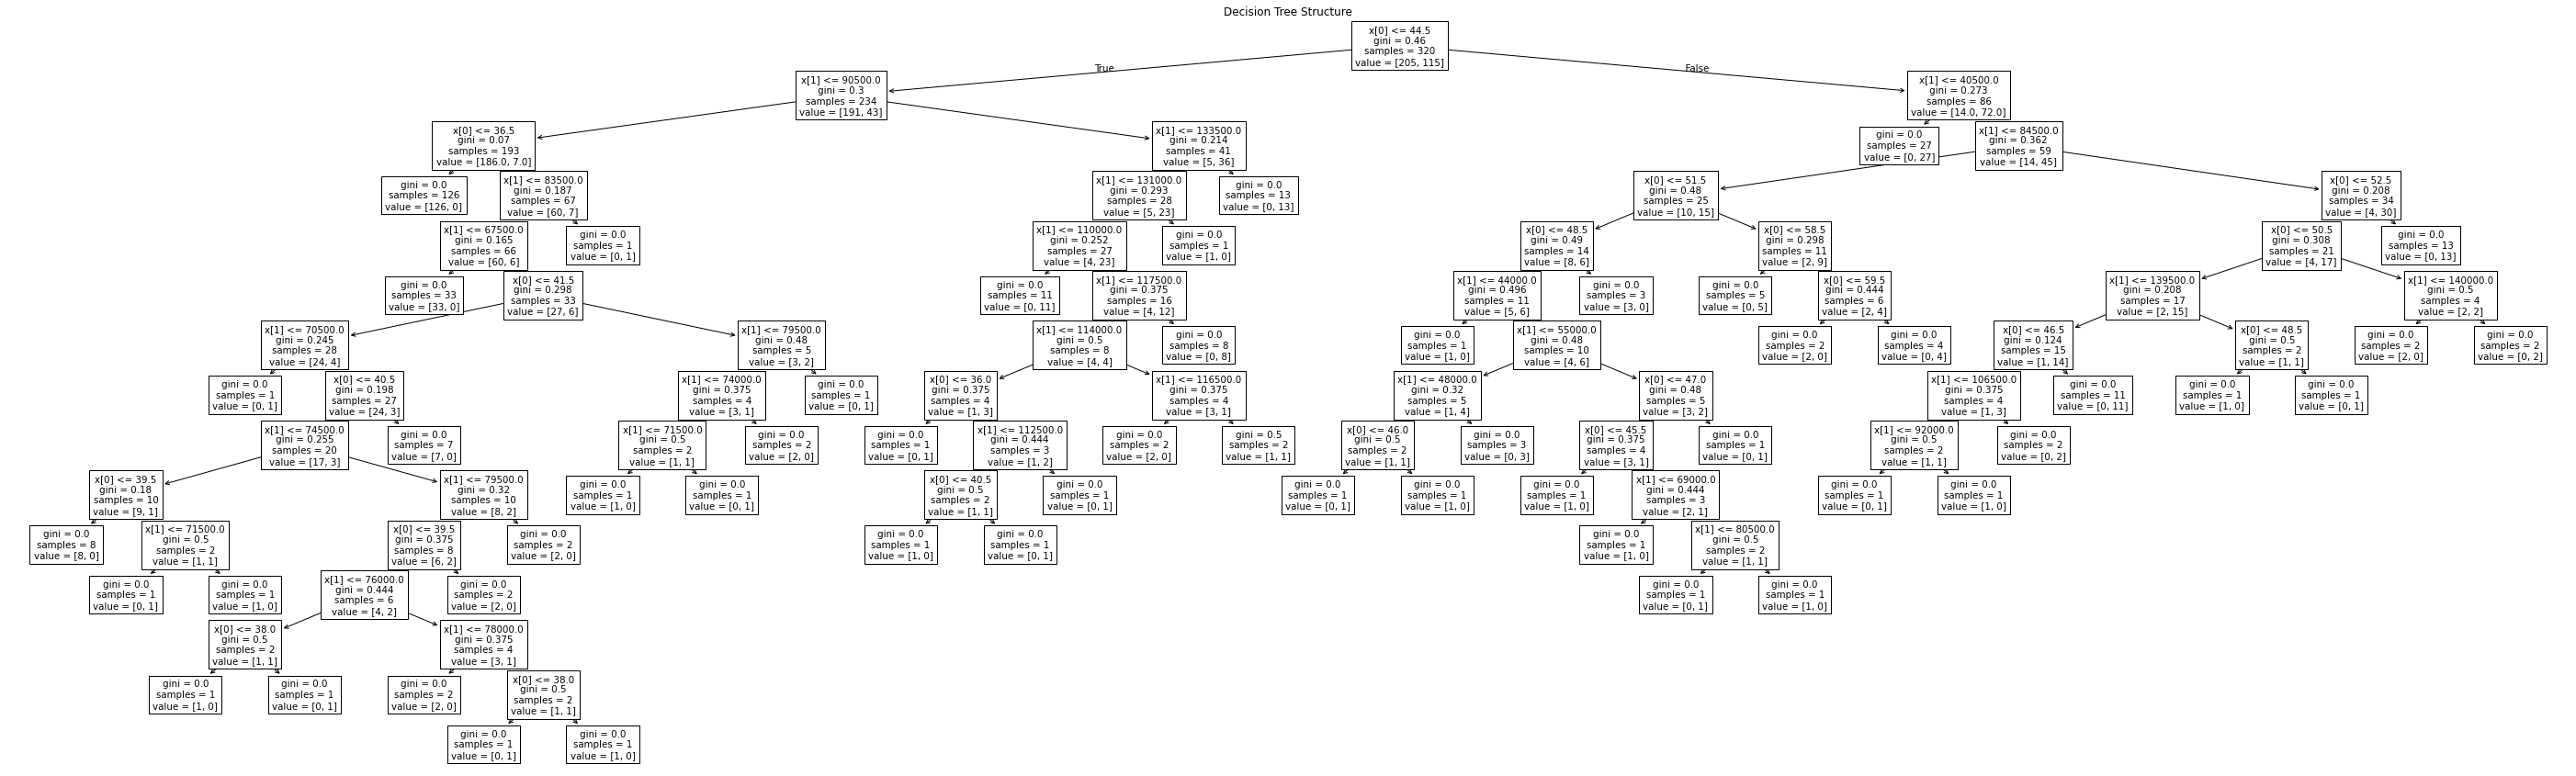

In [138]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 15))
plot_tree(model)
plt.title('Decision Tree Structure')
plt.show()

## Decision Tree Alogorithm (Use for Both Classification & Regression)
##### (Practice Regression Example)

In [16]:
dataset_reg = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Ice_cream selling data.csv')
dataset_reg.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


In [17]:
dataset_reg.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

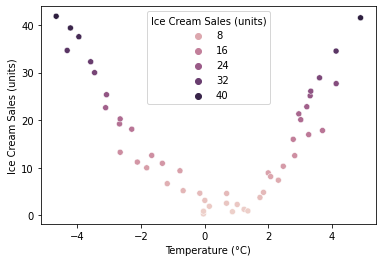

In [18]:
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=dataset_reg, hue='Ice Cream Sales (units)')
plt.show()

In [19]:
x = dataset_reg.iloc[:,:-1]
y = dataset_reg['Ice Cream Sales (units)']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [29]:
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor(criterion='squared_error', random_state=42)
DTR_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
print(f"Train Score: {DTR_model.score(x_train, y_train) * 100:.2f}%")
print(f"Test Score: {DTR_model.score(x_test, y_test) * 100:.2f}%")

Train Score: 100.00%
Test Score: 81.48%


In [31]:
DTR_model.predict([[-4.662263]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([41.84298632])

In [32]:
DTR_model.predict([[-2.111870]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([11.21829447])

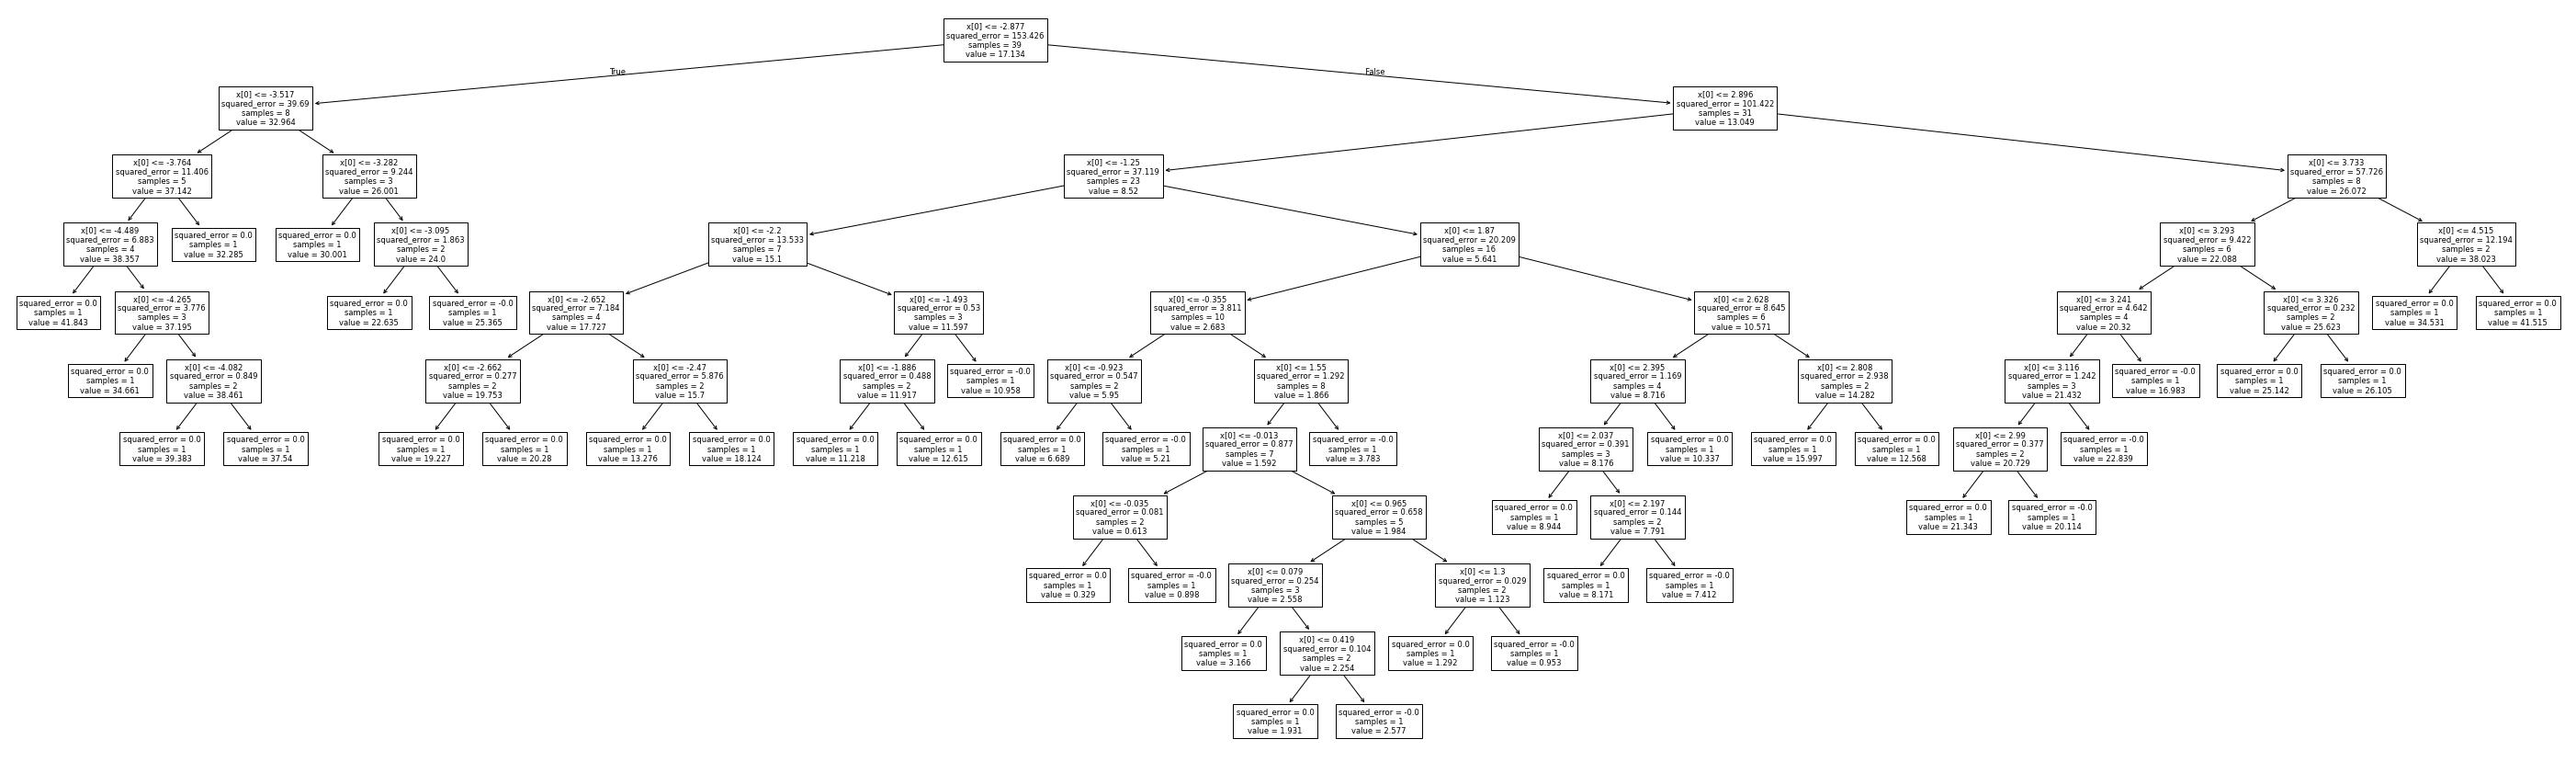

In [33]:
plt.figure(figsize=(50,15))
plot_tree(DTR_model)
plt.show()

# Decision Tree (Purning Pre and Psot Purning)

#### Pre Purning example solve with classification

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Social_Network_Ads.csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
dataset.drop(['User ID','Gender'], axis=1, inplace=True)

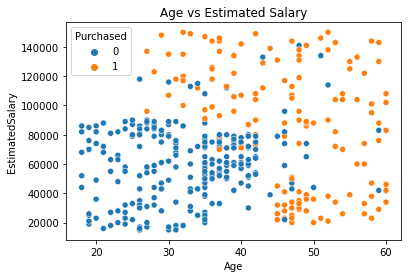

In [4]:
# check data is linearly separable or not but this is not a linear model
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')
plt.title('Age vs Estimated Salary')
plt.show()

In [5]:
x =dataset.iloc[:, :-1]
y = dataset['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [7]:
# Decision Tree Classifier with pre purning to avoid overfitting 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=3)  # Limiting the depth to avoid overfitting
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
print(f"Train Score: {model.score(x_train, y_train) * 100:.2f}%")
print(f"Test Score: {model.score(x_test, y_test) * 100:.2f}%")

Train Score: 91.88%
Test Score: 91.25%


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


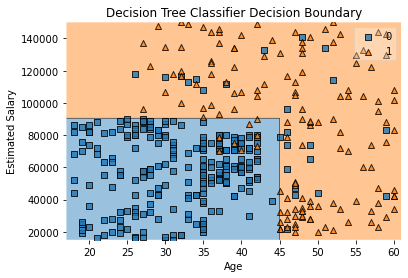

In [9]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=model)
plt.title('Decision Tree Classifier Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [10]:
model.predict([[25,33000]]) # predicting for a data point with age 25 and estimated salary 33000

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

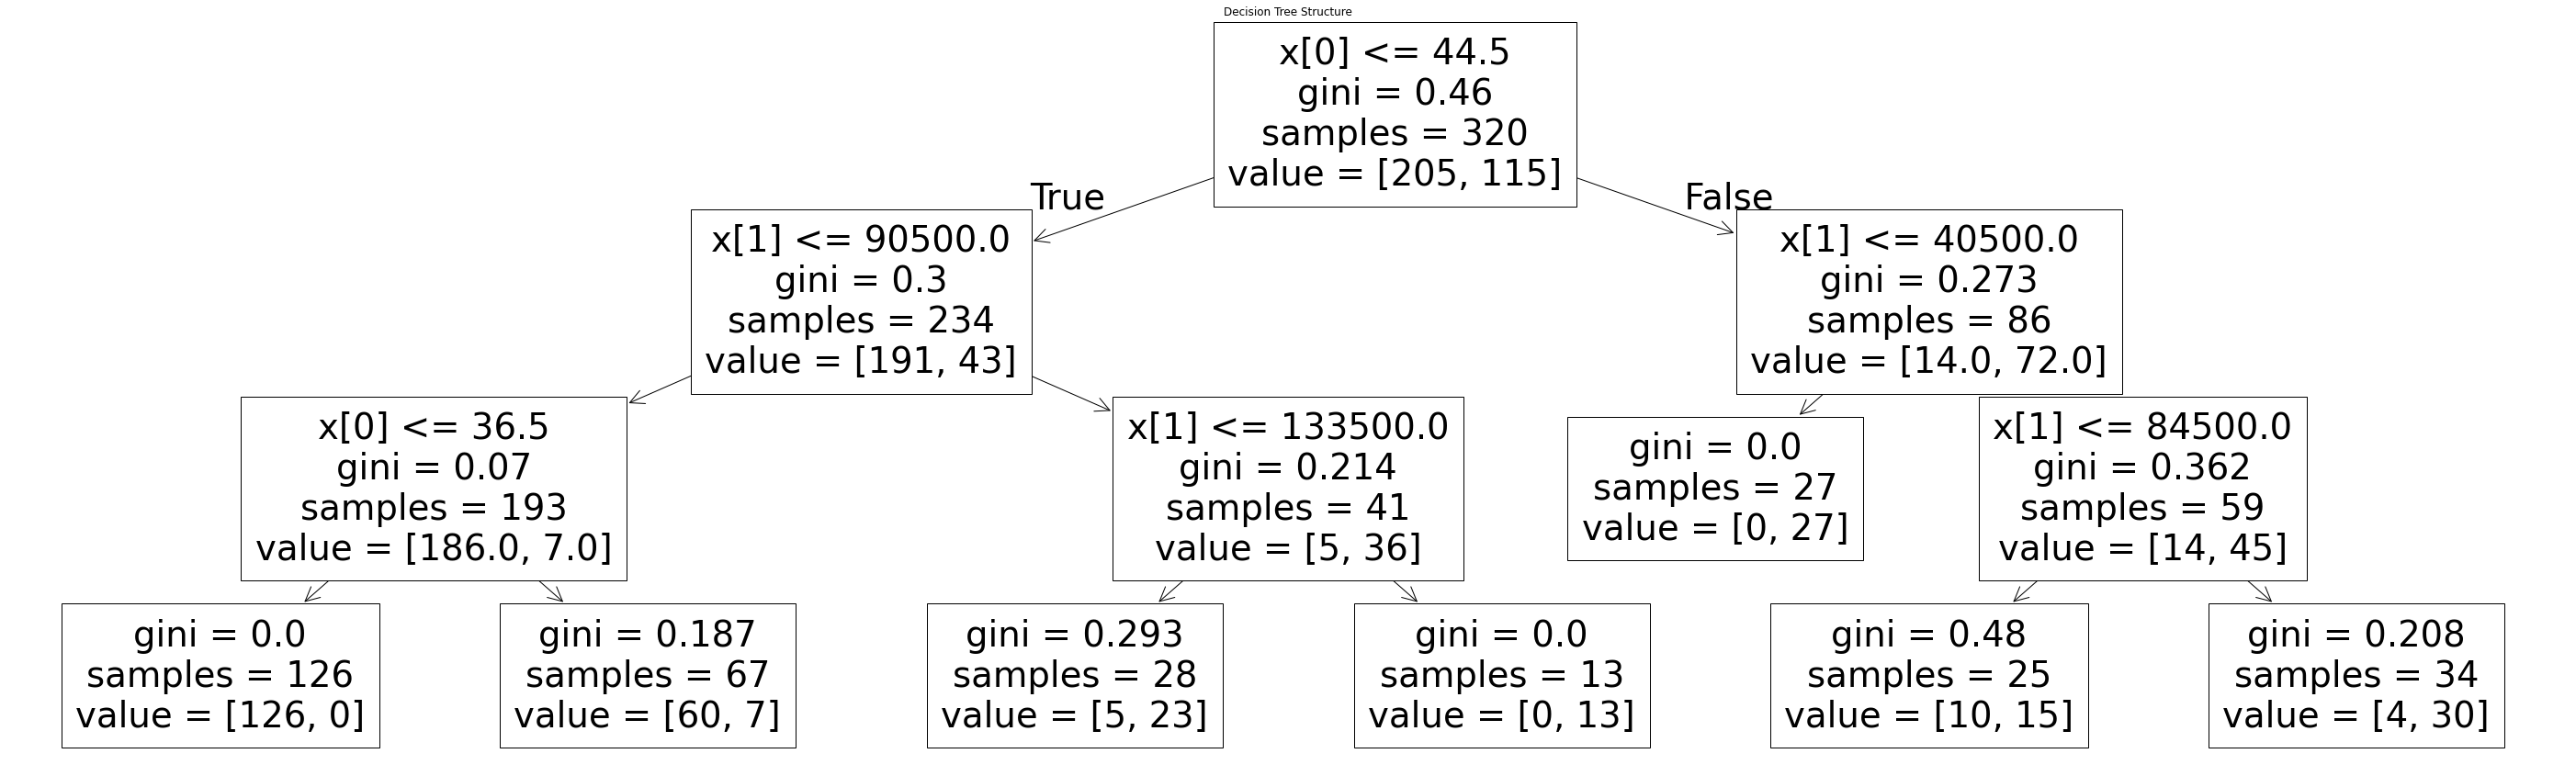

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 15))
plot_tree(model)
plt.title('Decision Tree Structure')
plt.show()

### Decision Tree with Post Purning

In [12]:
for i in range(1,20):
    model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=i)
    model.fit(x_train, y_train)
    print(f"Max Depth: {i}, Train Score: {model.score(x_train, y_train) * 100:.2f}%, Test Score: {model.score(x_test, y_test) * 100:.2f}%")




Max Depth: 1, Train Score: 82.19%, Test Score: 90.00%
Max Depth: 2, Train Score: 91.88%, Test Score: 91.25%
Max Depth: 3, Train Score: 91.88%, Test Score: 91.25%
Max Depth: 4, Train Score: 93.12%, Test Score: 91.25%
Max Depth: 5, Train Score: 93.44%, Test Score: 90.00%
Max Depth: 6, Train Score: 95.00%, Test Score: 86.25%
Max Depth: 7, Train Score: 96.88%, Test Score: 85.00%
Max Depth: 8, Train Score: 97.50%, Test Score: 85.00%
Max Depth: 9, Train Score: 98.12%, Test Score: 85.00%
Max Depth: 10, Train Score: 98.44%, Test Score: 85.00%
Max Depth: 11, Train Score: 99.06%, Test Score: 83.75%
Max Depth: 12, Train Score: 99.06%, Test Score: 83.75%
Max Depth: 13, Train Score: 99.38%, Test Score: 83.75%
Max Depth: 14, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 15, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 16, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 17, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 18, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 19, Trai

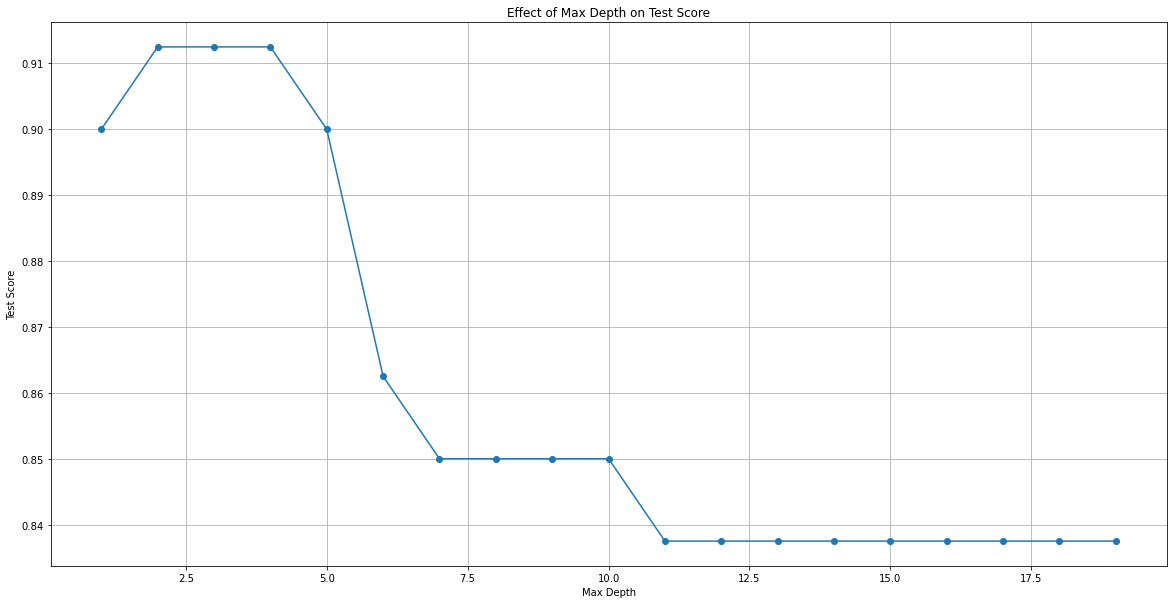

In [13]:
# Visualizing the effect of max_depth on the decision tree
plt.figure(figsize=(20, 10))
plt.plot(range(1, 20), [DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=i).fit(x_train, y_train).score(x_test, y_test) for i in range(1, 20)], marker='o')
plt.title('Effect of Max Depth on Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Test Score')
plt.grid()
plt.show()

In [14]:
model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=2)
model.fit(x_train, y_train)
print(f"Max Depth: {i}, Train Score: {model.score(x_train, y_train) * 100:.2f}%, Test Score: {model.score(x_test, y_test) * 100:.2f}%")

Max Depth: 19, Train Score: 91.88%, Test Score: 91.25%


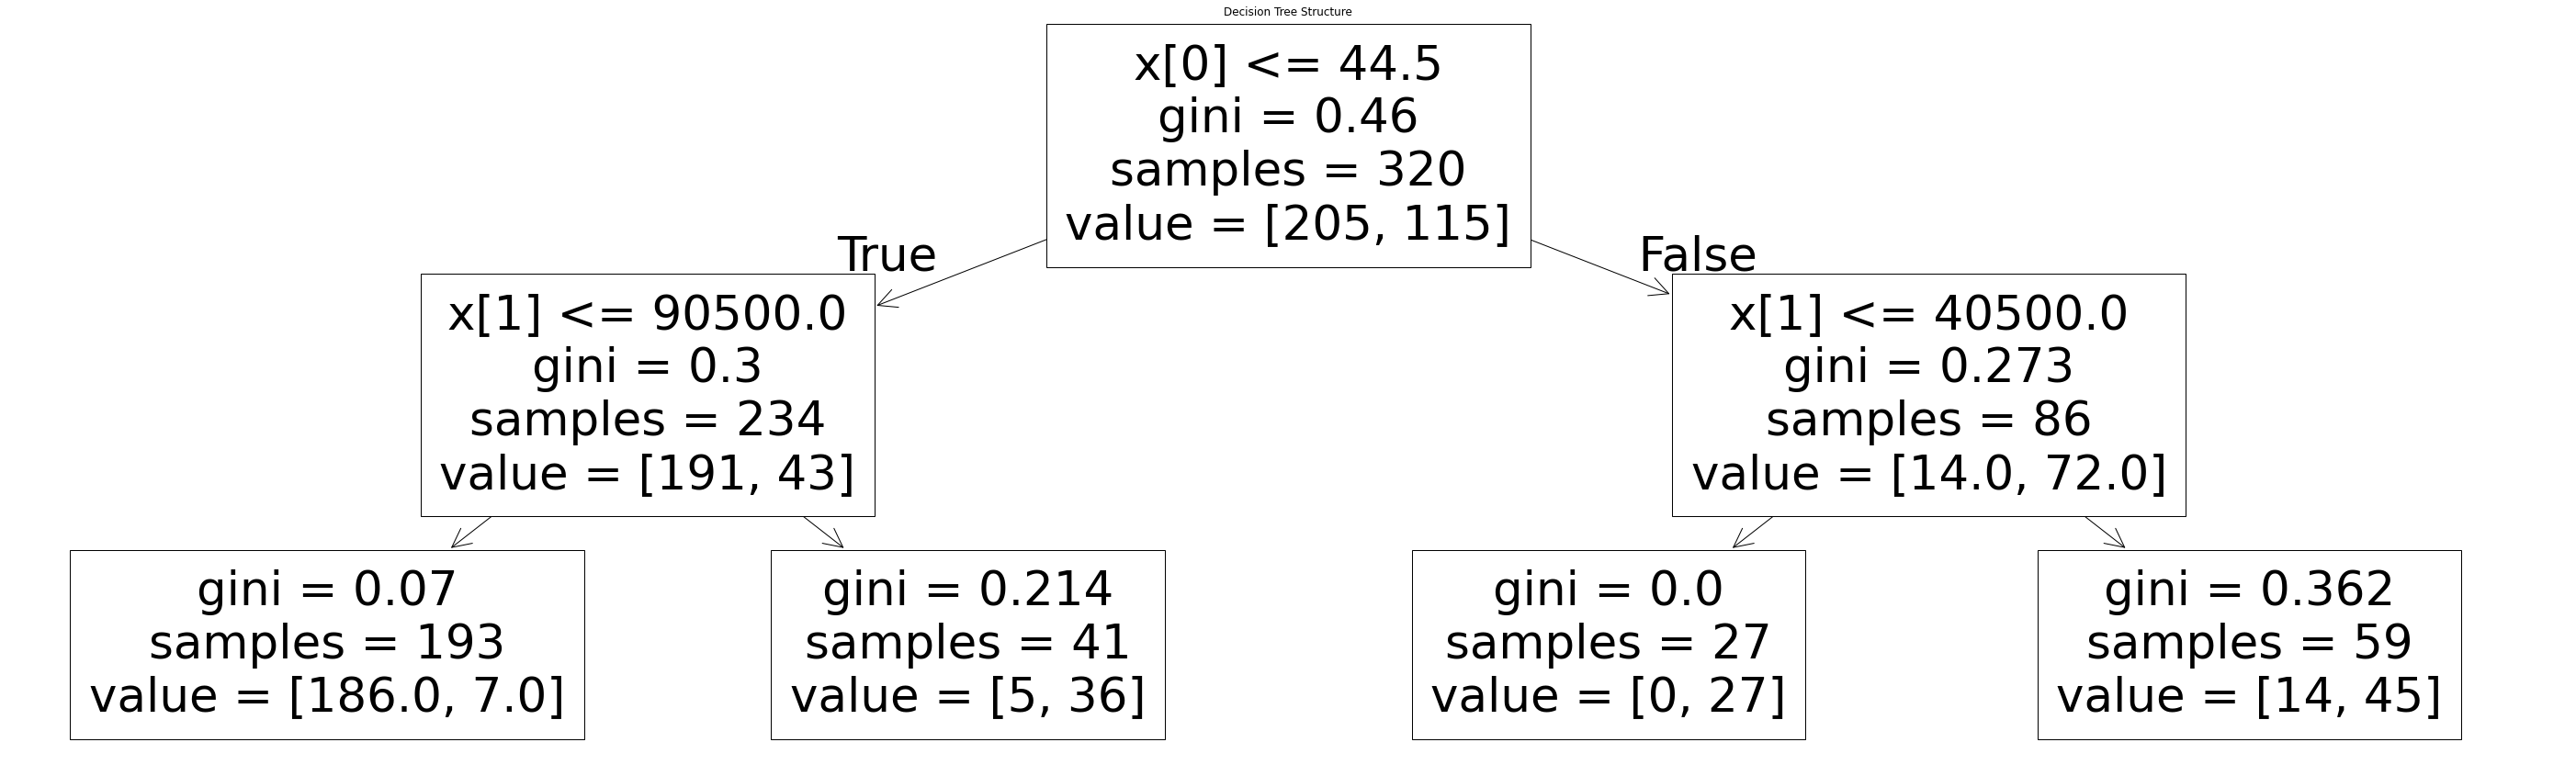

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 15))
plot_tree(model)
plt.title('Decision Tree Structure')
plt.show()